# Task 1: Write a dynamic function to find the derivative of any function f(x)

In [9]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [10]:
#TO DO: Create a function that does a derivative for any function
def dy_dx(func_expr, x):
  ''' Calculated the derivative of a given function '''


  x_sym = sp.symbols(x)
  func = sp.sympify(func_expr) # Convert the input string expression to a SymPy expression

  # Calculate the derivative
  derivative = sp.diff(func, x_sym)

  return str(derivative)

# Task 2: Test the derivative function written with a quadratic equation of your choice
*NB: Must have atleast 2 minimas and atleast 2 maximas*

In [27]:
function_expression = 'x**2 - 4*x + 4'
variable_of_interest = 'x'

# Test the derivative function
derivative = dy_dx(function_expression, variable_of_interest)
print( f'Derivative: {derivative}')

Derivative: 2*x - 4


#Task 3: Plot a graph of the quadratic Equation

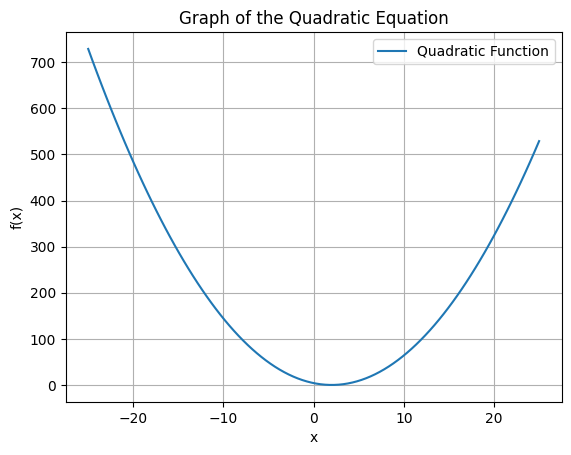

In [40]:
#Create a visualization of the quadratic equation
quadratic_function = sp.lambdify(variable_of_interest, function_expression, 'numpy')
x_values = np.linspace(-25, 25, 100)
y_values = quadratic_function(x_values)

plt.plot(x_values, y_values, label='Quadratic Function')
plt.title('Graph of the Quadratic Equation')
plt.xlabel(variable_of_interest)
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Task 4: Create separate array of Minimas and maximas

In [53]:
from scipy.optimize import minimize_scalar

def get_maxima_minima(func_x):
    # Define the function for optimization
    x = sp.symbols('x')
    objective_function = sp.lambdify(x, func_x, 'numpy')

    # Set finite bounds for optimization
    bounds = (-10, 10)  # Adjust the range as needed

    # Find the minimum
    result_min = minimize_scalar(objective_function, bounds=bounds)

    # Reverse the sign of the function to find the maximum
    func_x_max = -func_x
    objective_function_max = sp.lambdify(x, func_x_max, 'numpy')

    # Find the maximum with bounds
    result_max = minimize_scalar(objective_function_max, bounds=bounds)

    return round(result_min.x, 1), round(result_min.fun, 1), round(result_max.x, 1), round(result_max.fun, 1)

# Example usage:
function_expression = 'x**2 - 4*x + 4'

# Convert the input string expression to a SymPy expression
quadratic_function = sp.sympify(function_expression)

# Get minima and maxima
minima_x, minima_y, maxima_x, maxima_y = get_maxima_minima(quadratic_function)

# Print the rounded results
print(f'The minima is at x = {minima_x} with y = {minima_y}')
print(f'The maxima is at x = {maxima_x} with y = {maxima_y}')


The minima is at x = 2.0 with y = 0.0
The maxima is at x = -10.0 with y = -144.0


In [54]:
Global_maxima = (maxima_x, maxima_y)
Global_minima = (minima_x, minima_y)

# Print the global maxima and minima
print(f'The global maxima is {Global_maxima}')
print(f'The global minima is {Global_minima}')

The global maxima is (-10.0, -144.0)
The global minima is (2.0, 0.0)


#5. Finally, What is the global Minima and the Global maxima _ Plot this so that I can see

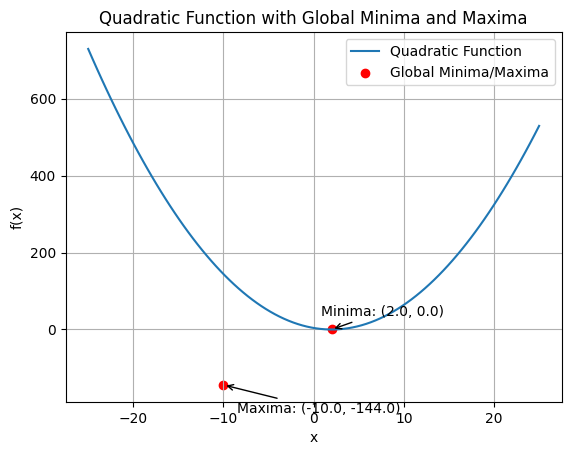

In [56]:
# Plot the quadratic function
x_vals = np.linspace(-25, 25, 100)
y_vals = [quadratic_function.subs('x', val) for val in x_vals]

plt.plot(x_vals, y_vals, label='Quadratic Function')
plt.scatter([minima_x, maxima_x], [minima_y, maxima_y], color='red', marker='o', label='Global Minima/Maxima')

# Highlight the global minima and maxima
plt.annotate(f'Minima: {Global_minima}', xy=Global_minima, xytext=(-8, 10),
             textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))
plt.annotate(f'Maxima: {Global_maxima}', xy=Global_maxima, xytext=(10, -20),
             textcoords='offset points', arrowprops=dict(facecolor='black', arrowstyle='->'))

plt.title('Quadratic Function with Global Minima and Maxima')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()